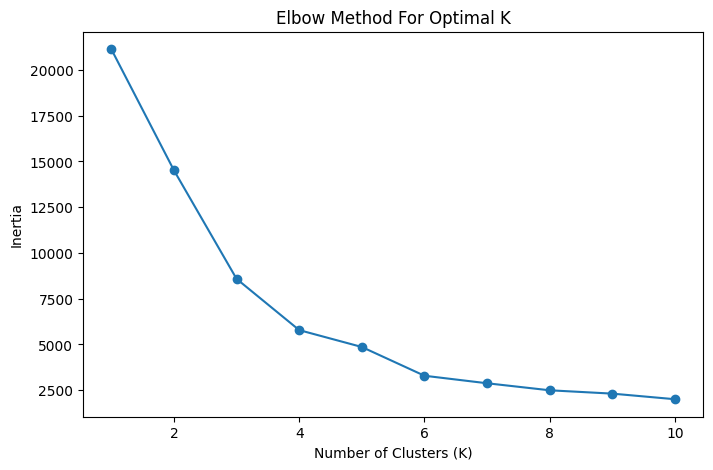

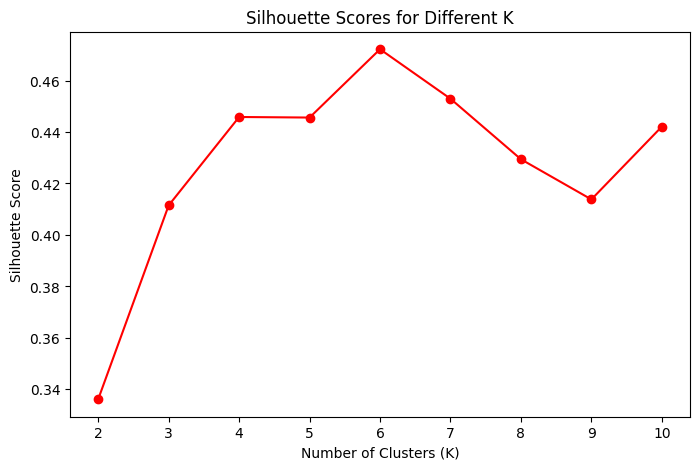

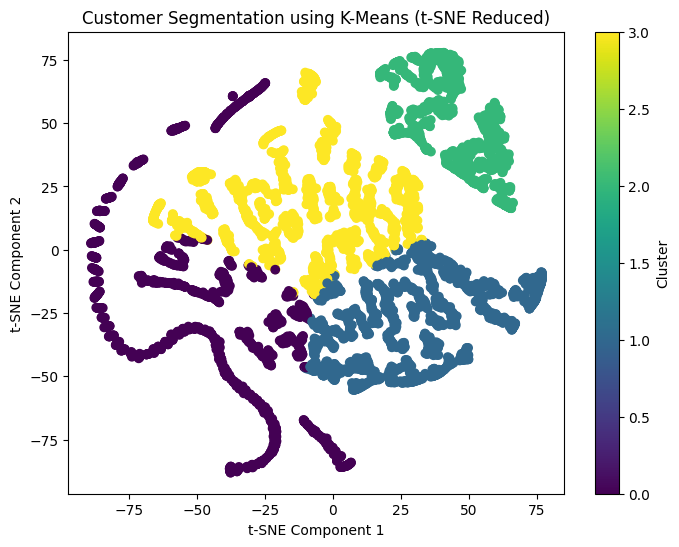

Cluster Centroids (Feature Space):
 [[-0.43991649 -0.12131052 -1.30396529]
 [-0.43991649  1.05261043  0.77140653]
 [ 2.27315869  0.03765914  0.50048894]
 [-0.43991649 -0.81107936  0.27283212]]
Cluster Centroids (Original Feature Space):
 [[-5.10702591e-15  2.93920368e+01  2.55281011e+01]
 [-4.21884749e-15  5.82208791e+01  8.79717033e+01]
 [ 1.00000000e+00  3.32959720e+01  7.98203590e+01]
 [-6.02295991e-15  1.24528746e+01  7.29706409e+01]]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Step 1: Load and Prepare the Data
customer_data = pd.read_csv('cleaned_data.csv')

# Select only numerical features for scaling
# Assuming 'gender' and other non-numerical columns are not relevant for clustering
numerical_features = customer_data.select_dtypes(include=np.number).columns
numerical_data = customer_data[numerical_features]

# Step 2: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Step 3: Determine Optimal K using Elbow Method
inertia = []
K_range = range(1, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Step 4: Calculate Silhouette Scores
silhouette_scores = []
for K in K_range[1:]:
    kmeans = KMeans(n_clusters=K, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(K_range[1:], silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 5: Train K-Means Model with Optimal K
optimal_k = 4  # Assume the optimal number of clusters is 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Assign Cluster Labels
customer_data['Cluster'] = kmeans.labels_

# Step 6: Visualize Clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=customer_data['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation using K-Means (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Interpretation
centroids = kmeans.cluster_centers_
print("Cluster Centroids (Feature Space):\n", centroids)

# Optional: Inverse transform the centroids to original feature space
original_space_centroids = scaler.inverse_transform(centroids)
print("Cluster Centroids (Original Feature Space):\n", original_space_centroids)


In [10]:
import pickle

# Assuming 'kmeans' is the variable holding your trained KMeans model from the previous cell
# Save the model using pickle, use 'kmeans' instead of 'kmeans_model'
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)  # Changed 'kmeans_model' to 'kmeans'

# To load the model back later
with open('kmeans_model.pkl', 'rb') as file:
    kmeans_loaded_model = pickle.load(file)